# CS 237 Spring 2020, Homework 11 

### Due date: Saturday, May 2nd

## General Instructions

This homework contains programming problems with some commentary on interpreting the results. Its goal is simply to exercise your understanding of multi-variate data and how to
display it, and linear regression. 


In [106]:
# General useful imports
import numpy as np
from numpy import arange,linspace,mean, var, std, corrcoef, transpose, ones,log
from numpy.linalg import inv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
from numpy.random import seed,random, randint, uniform
import math
from collections import Counter
import pandas as pd
%matplotlib inline


from math import log, pi, log, floor, ceil, sqrt       # import whatever you want from math

from scipy.special import comb
           
def C(N,K):    
    return comb(N,K,True)     # just a wrapper around the scipy function


# Here are the basic statistical functions we will use from numpy

from numpy import mean, var, std, median

L = [2,4,3,6,4,5]

# mean value

mean(L)          


# Variance
#  ddof = delta degrees of freedom, default is 0

# population variance
var(L)      

# sample variance
var(L,ddof=1)

# Standard deviation
#  ddof = delta degrees of freedom, default is 0

# population standard deviation
std(L)      

# sample standard deviation
std(L,ddof=1)  

# Median

median(L)  

# Random sampling of `size` elements from list with or without replacement

np.random.choice(L,size=1,replace=True)
       
# Scipy statistical functions

from scipy.stats import norm, binom, expon, geom, poisson, gamma, nbinom, bernoulli,uniform                 

# https://docs.scipy.org/doc/scipy/reference/stats.html

#### Normal Distribution    #####

######   Note that in this library loc = mean and scale = standard deviation  #####

# Examples assume random variable X (e.g., housing prices) normally distributed with  mu = 60, sigma = 10

# Probability Density Function    (really only useful for drawing the curve)
#  f(x) = P(X == x)

norm.pdf(x=50,loc=60, scale= 10)     

# Cumulative Density Function
#  F(x) = P(X < x)

# Example:  Percentage of houses less than 50K. 
norm.cdf(x=50,loc=60,scale=10) 

# Example:  Find P(60<X<80)
norm.cdf(x=80,loc=60,scale=40) - norm.cdf(x=60,loc=60,scale=40)

# Survival Function: Simply 1 - CDF, i.e., P(X > x)

# Example:  Percentage of houses more than 50K.
norm.sf(x=50,loc=60,scale=10) 

# Percentage Point Function: Inverse of the CDF:
# For what is the largest value of k for which P( X < k ) = q  ?

# Example: What is the maximum cost of the 5% cheapest houses, 
# i.e., the x such that P(X < x) = 0.05?

norm.ppf(q=0.05,loc=60,scale=40)

# Inverse Survival Function: Inverse (1 - CDF):
# For what is the smallest value of k for which P( X > k ) = q  ?

# Example: What is the minimum cost of the 5% most expensive houses, 
# i.e., the x such that P(X > x) = 0.05?

norm.isf(q=0.05,loc=60,scale=40)

#   Give the endpoints of the interval (centered on the mean)
#   which contain alpha/100 percent of the population (alpha is a probability)

# Ex. Give the interval for the middle 75% of the houses

norm.interval(alpha=0.75, loc=60, scale=40)

# generate a random variate
norm.rvs(loc=60, scale=40)

# generate random variates, returns list of length = size
norm.rvs(loc=60, scale=40, size=10)

#####   Exponential Distribution     ########

#####  loc = minimum value (leave at 0 always)               ##### 
#####  scale = mean = 1 / lambda (using textbook notation)   #####

# Probability Density Function  f(x)       (Only useful for graphing and showing shape)

lam = 4
expon.pdf(x=5,loc=0, scale=1/lam)        # Must use 'scale = 1/lambda' to be consistent with textbook and lecture  

# Cumulative Density Function
#  F(x) = P(X < x)

expon.cdf(x=5,loc=0,scale=1/lam) 

# Example:  Find P(6<X<8)
expon.cdf(x=8,loc=0,scale=1/lam) - expon.cdf(x=6,loc=0,scale=1/lam)

# Percentage Point Function: Inverse of the CDF:
# For which value of x does P( X < x ) = q  ?

expon.ppf(q=0.05,loc=0,scale=1/lam)

# Survival Function: Simply 1 - CDF, i.e., P(X > x)

expon.sf(x=5,loc=0,scale=1/lam) 

# Inverse Survival Function: Inverse (1 - CDF):
# For what is the value of k for which P( X > k ) = q  ?

expon.isf(q=0.05,loc=0,scale=1/lam)

#g. generate a random variate
expon.rvs(loc=0, scale=1/lam)

#h. generate random variates, returns list of length = size
expon.rvs(loc=0, scale=1/lam, size=10)

## Uniform Distribution

uniform.rvs(0,1)     # from [0,1)
uniform.rvs(0,10)   # from [0,10)
uniform.rvs(0,1,size=100)



## DISCRETE DISTRIBUTIONS

##### Bernoulli Distribution  X ~ Bernoulli(p)  ####

#  p = probability of success for Bernoulli trial

# Generate a random variate
bernoulli.rvs(p=0.5)

# Generate a list of random variates
bernoulli.rvs(p=0.5,size=100)

##### Binomial Distribution  X ~ B(n,p)  ####

#  n = number of independent Bernoulli trials
#  p = probability of success for Bernoulli trial
#  k = outcome in range [0 .. n]

# Generate a random variate
binom.rvs(n=10, p=0.5)

# Generate a list of random variates
binom.rvs(n=10, p=0.5,size=100)

# Probability mass function.
binom.pmf(k=4, n=10, p=0.5)

# Cumulative distribution function
binom.cdf(k=4, n=10, p=0.5)

print() 

# Geometric distribution

geom.rvs(0.5)

geom.rvs(0.5,size=10)



# Uniform discrete random variates:

randint(2)          # one randome variate in {0,1}

randint(3,10,size=10)       # 10 random variates in [3,10) = [3,4,...,8,9]


# Calculate the covariance and correlation coefficient

def covariance(X,Y):
    return cov(X,Y)[0][1]

def rho(X,Y):
    return corrcoef(X,Y)[0][1]

def R2(X,Y):
    return corrcoef(X,Y)[0][1] ** 2


# Round to 2 decimal places
def round2(x):
    return np.around(x,2)

# Round to 4 decimal places
def round4(x):
    return np.around(x,4)

def probToPercent(p):
    pc = p*100
    if round(pc) == pc:
        return str(round(pc)) + "%"
    else:
        return str(round(pc,2))+ "%"
    
import matplotlib.gridspec as gridspec

def display2DScatterAndMarginals(x,y,titl="Scatterplot of (X,Y)"):
    fig = plt.figure(figsize=(12,12))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    gs = gridspec.GridSpec(3, 3)
    ax_main = plt.subplot(gs[1:3, :2])
    ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
    ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)

    ax_main.scatter(x,y,marker='.',)
    #ax_main.set(xlabel="X", ylabel="Y")
    ax_main.set_title(titl,fontsize=12)
    ax_main.set_ylabel("Y",rotation=0,fontsize=14)
    ax_main.set_xlabel("X",rotation=0,fontsize=14)

    ax_xDist.hist(x,bins=100,align='mid',edgecolor='black')
    ax_xDist.set(ylabel='count')
    ax_xDist.set_title('X')

    ax_yDist.hist(y,bins=100,orientation='horizontal',align='mid',edgecolor='black')
    ax_yDist.set(xlabel='count')
    ax_yDist.set_title('Y')

    plt.show()

    
def drawHeatMap(X,Y,titl="Heatmap of (X,Y)"):
    fig = plt.figure(figsize=(12,12))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    gs = gridspec.GridSpec(3, 3)
    ax_main = plt.subplot(gs[1:3, :2])
    ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
    ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)
    
    A = [[0 for i in range(max(X)+1)] for j in range(max(Y)+1)]
    
    for k in range(len(X)):
        A[Y[k]][X[k]] +=1       

    ax_main.imshow(A, cmap='hot', origin='lower',interpolation='nearest')

    #ax_main.scatter(x,y,marker='.',)
    #ax_main.set(xlabel="X", ylabel="Y")
    ax_main.set_title(titl,fontsize=12)
    ax_main.set_ylabel("Y",rotation=0,fontsize=14)
    ax_main.set_xlabel("X",rotation=0,fontsize=14)
    xbins = np.linspace(min(X)-0.5,max(X)+0.5,(max(X)-min(X)+2))
    ax_xDist.hist(X,bins=xbins,width=1.0,edgecolor='black')
    ax_xDist.set(ylabel='count')
    ax_xDist.set_title('X')
    
    ybins = np.linspace(min(Y)-0.5,max(Y)+0.5,(max(Y)-min(Y)+2))
    ax_yDist.hist(Y,bins=ybins,orientation='horizontal',align='mid',edgecolor='black')
    ax_yDist.set(xlabel='count')
    ax_yDist.set_title('Y')

    plt.show()



def draw_3D_scatter(X1,Y1,Z1,labels=['X','Y','Z'], reference=True, rot= -60):

    if reference:
        hiX = hiY = hiZ = 1.0
        loX = loY = loZ = -1.0
    else:
        loX = min(X1)
        hiX = max(X1)
        loY = min(Y1)
        hiY = max(Y1)
        loZ = min(Z1)
        hiZ = max(Z1)

    # make the X,Y grid

    X = np.linspace(loX, hiX, 100)
    Y = np.linspace(loY, hiY, 100)
    X, Y = np.meshgrid(X, Y)

    # Draw the figure

    fig = plt.figure(figsize=(14,12))
    ax = fig.gca(projection='3d')
    ax.view_init(elev=20, azim=rot)         # <==  set viewing angle here
    ax.set_xlim(loX, hiX)
    ax.set_ylim(loY, hiY)
    ax.set_zlim(loZ, hiZ)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])

    if reference:
        lim = 1.0
#         plot reference grid
#         planes
        ax.plot_surface(X, Y, np.zeros((100,100), dtype=int), alpha=0.1)
        ax.plot_surface(X, np.zeros((100,100), dtype=int), Y, alpha=0.1)
        ax.plot_surface(np.zeros((100,100), dtype=int), X, Y, alpha=0.1)
#         lines
        ax.plot([0,0],[0,0],[-lim,lim],c='k', alpha=0.5)
        ax.plot([0,0],[-lim,lim],[0,0],c='k', alpha=0.5)
        ax.plot([-lim,lim],[0,0],[0,0],c='k', alpha=0.5)
#     origin point
        ax.scatter([0],[0],[0])

    # plot the random points

    ax.scatter(X1, Y1, Z1, color='b',marker='.')

    plt.show()
    
    
def draw_3D_histogram(Xdata,Ydata,limit=21):
    
    # create histogram from X, Y data
    
    A = [[0 for i in range(limit)] for j in range(limit)]
    
    for k in range(len(Xdata)):
        A[Xdata[k]][Ydata[k]] +=1  
        
    # now create data for bars
    
    X = []
    Y = []
    Z = []
    
    for i in range(limit):
        for j in range(limit):
            if A[i][j] > 0:
                X.append(i)
                Y.append(j)
                Z.append(A[i][j])
    
       
    # setup the figure and axes
    fig = plt.figure(figsize=(15, 12))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.view_init(30, 60)

    bottom = np.zeros_like(Z)

    ax.set_title('3D Histogram')

    ax.set_xlim((0,limit))
    ax.set_ylim((0,limit))

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Frequency')
    
    ax.bar3d(X, Y, bottom, 1, 1, Z)

    plt.show()

    
    
# Draw scatterplot for bivariate data and draw linear regression line
# with midpoint (mux,muy)
    
def LinearRegression(X,Y,titl="Linear Regression", xlab="X",ylab="Y"):

    n = len(X)
    
    # basic 
    mux = mean(X)
    muy = mean(Y)
    sdx = std(X)
    sdy = std(Y)
        
    r = rho(X,Y)
    
    r2 = r**2
       
    m = r * sdy / sdx
    b = muy - m*mux
    
    # Predicted values from regression line
    
    Yhat = [(m*X[i]+b) for i in range(n)]
    
    # Residuals
    
    E = [(Y[i] - Yhat[i]) for i in range(n)]
    
    # residual sum of squares -- deviations of data from line
    rss = sum( [ e**2 for e in E])
    
    # explained sum of squares -- deviation of line from mean of y
    egss = sum( [ (Yhat[i] - muy)**2 for i in range(n)])
    
    # total sum of squares -- deviation of data from mean of y
    tss = sum( [ (Y[i] - muy)**2 for i in range(n)] )
     
    # alternate way to compute r^2 statistic
    
    #r2 = regss / tss
    
    plt.figure(figsize=(10,10))
    plt.grid()
    
    linex = [min(X),max(X)]
    liney = [(m*x+b) for x in linex]

    plt.scatter(X,Y,label='Data')
    plt.plot(linex,liney,'r--',label='Trendline')
    plt.scatter([mux],[muy],label='Midpoint')           # add diamond shape?  'rD'
    plt.title(titl,fontsize=16)
    plt.legend()
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.show()
    
    plt.figure(figsize=(10,4))
    plt.title("Graph of Residuals",fontsize=14)
    plt.grid()
    plt.xlabel(xlab)
    plt.ylabel("Y = Residuals")
    Yhat = [0 for x in X ]
    plt.scatter(X,E)
    plt.plot(X,Yhat,color='red')
    plt.show()



    print("\nmean(x):\t" + str(round4(mux)) + "\tstd(x):\t" + str(round4(sdx)))
    print("mean(y):\t" + str(round4(muy)) + "\tstd(y):\t" + str(round4(sdy)))
    print("\nrho:   " + str(round4(r)) + "\tR^2:   " + str(round4(r2)))
    print("\nResidual SS:   " + str(round4(rss)) + "\tExplained SS: " + str(round4(egss)) + "\tTotal SS:   " + str(round4(tss)))    
    
    if(b >= 0):
        print("\nRegression Line: y = " + str(round4(m)) + " * x + " + str(round4(b)))
    else:
        print("\nRegression Line: y = " + str(round4(m)) + " * x - " + str(round4(-b)))       


    
data_url = "http://www.cs.bu.edu/fac/snyder/cs237/Homeworks,%20Labs,%20and%20Code/data/"

## Problem One --  Scatterplots of Continuous Bivariate Data

First we will consider how to create *scatterplots* of random data in 2D dimensions, starting with continuous data points. We will use points from the uniform distribution over [0..10), and also the normal and exponential. 

### Part A

Apply the function `display2DScatterAndMarginals` to create a scatterplot of $10^4$ random points (x,y) uniformly distributed over the range $[0,10)\times [0,10)$ using the function:

>      uniform.rvs(lower_bound,upper_bound, size=num_trials).


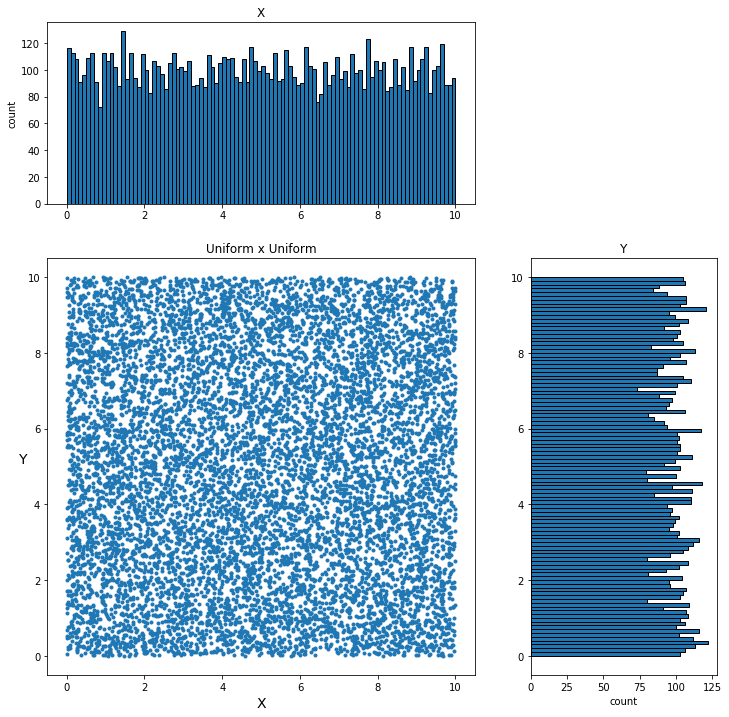

In [107]:
# (a)  

seed(0)

num_trials = 10**4

X = uniform.rvs(0,10,num_trials) # Your code here
Y = uniform.rvs(0,10,num_trials) 

display2DScatterAndMarginals(X,Y,'Uniform x Uniform')


## Part B

Do the same thing for normally-distributed points using 


>            norm_rvs(mu,sigma,size=num_trials)

Plot a *standard* normal on each axis. 

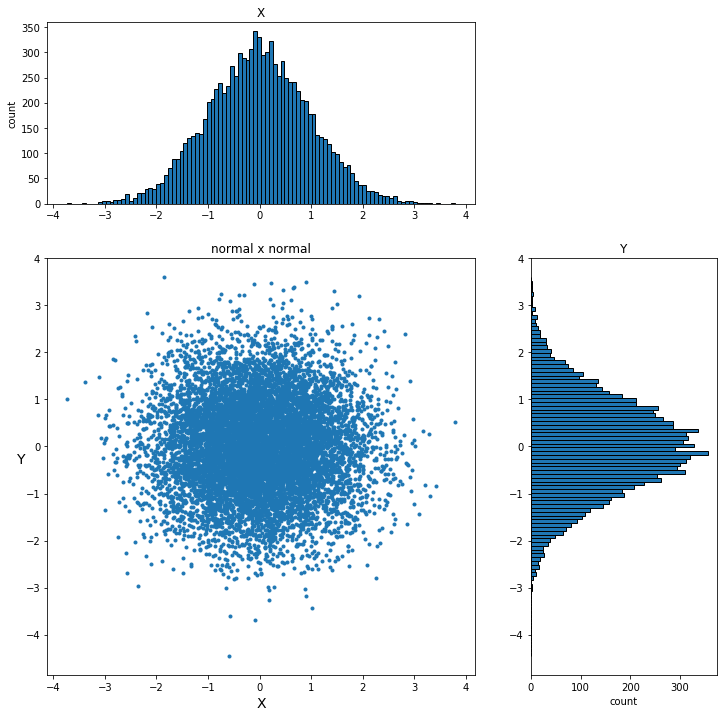

In [108]:
# (b)  

seed(0)

num_trials = 10**4

# Your code here
X = norm.rvs(0,1,num_trials)
Y = norm.rvs(0,1,num_trials)

display2DScatterAndMarginals(X,Y,'normal x normal')

## Part C

Now use the exponential distribution Exp(lam=3) for the x axis and uniform(0,1) for the y axis. Again, you will need to use the following for the exponential:

>           expon.rvs(0,1/lam,size=num_trials)
                 


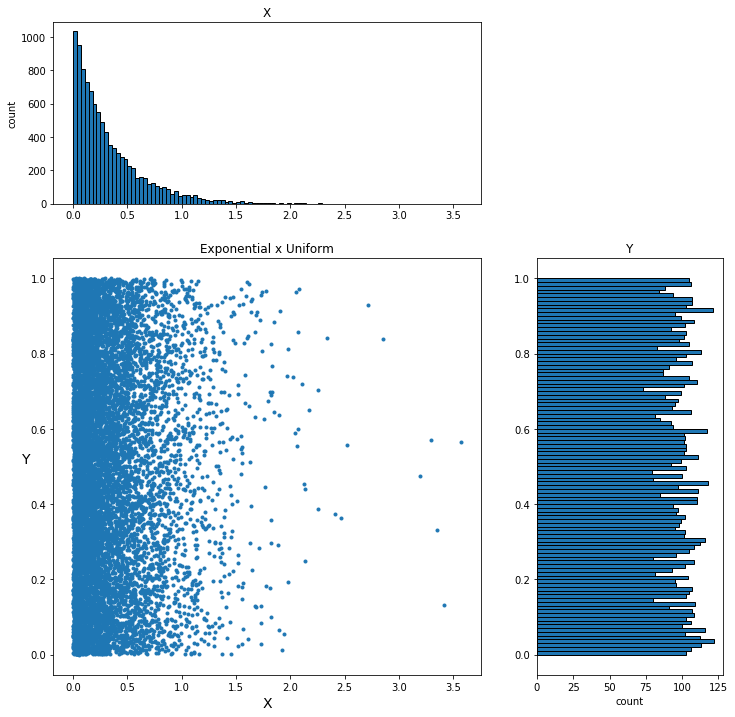

In [109]:
# (c)  

seed(0)

num_trials = 10**4

# Your code here
lam = 3
X = expon.rvs(0,1/lam,num_trials)
Y = uniform.rvs(0,1,num_trials)
display2DScatterAndMarginals(X,Y,'Exponential x Uniform')

## Part D -- Be Creative

Choose two marginal distributions and display the result. Play around
with this a bit, including the parameters to the various distributions, to see what the possibilities are!  Give as your solution
one that you find interesting and/or attractive. 

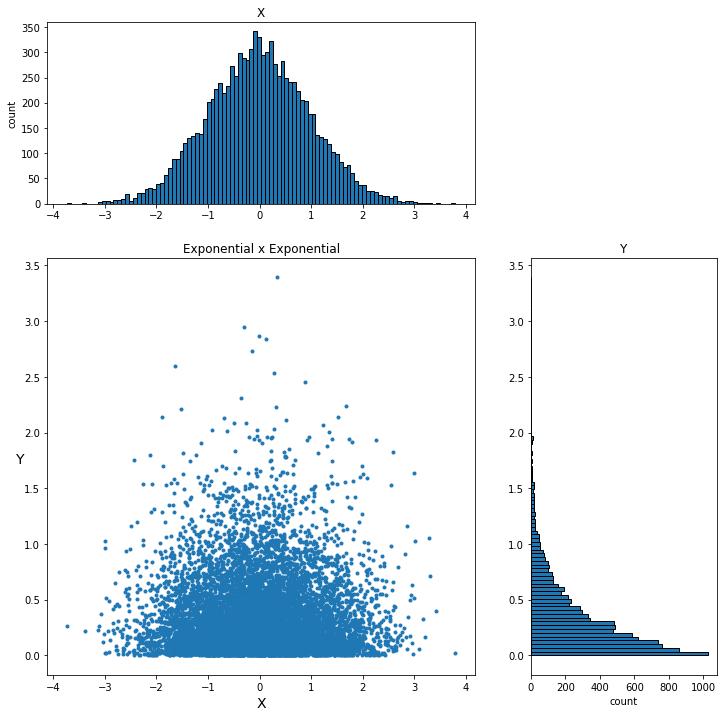

In [110]:
seed(0)

num_trials = 10**4

# Your code here
lam = 3
X = norm.rvs(0,1,num_trials)
Y = expon.rvs(0,1/lam,num_trials)
display2DScatterAndMarginals(X,Y,'Exponential x Exponential')


## Problem Two -- Heatmaps of Discrete Bivariate Data

Plotting random discrete data is a bit different, as we can't just plot the points, because
we have no obvious way to show when more than one value is plotted to the same point.
Therefore, we have to use some kind of histogram to show the frequencies
in each "bin," except that now we have an additional dimension.

A <b> heatmap</b> is a histogram which lays out the bins in a 2D matrix, and shows the frequency
by color: in our case, brighter colors indicate higher frequencies. 

We will try different distributions on each axis, as in the last problem, using the the 
discrete uniform, binomial, and geometric. These are the discrete analogues of the distributions in the previous problem, and you should try to see the correspondence. 

For heatmaps we need a fixed range of values, so we will need in each case to
have values in the range [0,20]. 

The function `drawHeatMap` is given in the first cell. 

## Part A

As in the previous problem, you will generate X and Y data values, but in this case you will use

                 randint(21)
                 
to generate num_trials integer variates in the range [0..20] for both the X and Y axes, 
and using the function `drawHeatMap`. 

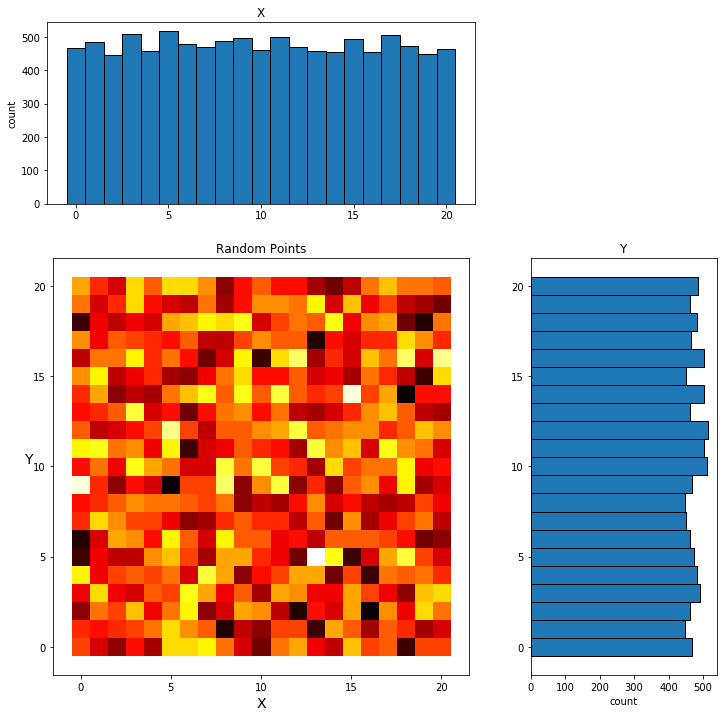

In [111]:
# (a) 

seed(0)

num_trials = 10**4

#  Your code here

X = [randint(21) for x in range(num_trials)]
Y = [randint(21) for y in range(num_trials)]
drawHeatMap(X,Y, 'Random Points')

## Part B

Do the same thing, but using 

>          binom.rvs(20,0.5)

for the X axis and

>          binom.rvs(20,0.7)

for the Y axis. 
                 

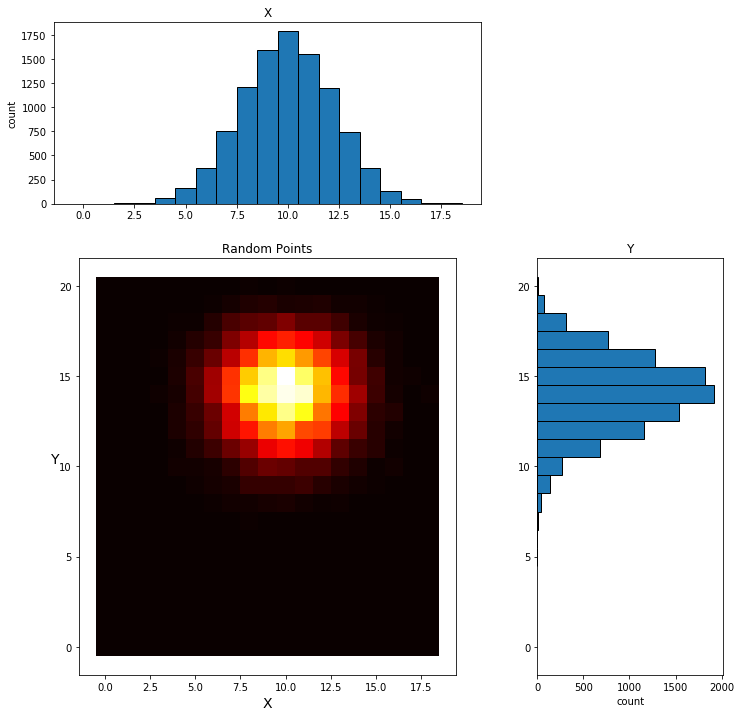

In [112]:
# (b) 

seed(0)
num_trials = 10**4

X = [binom.rvs(20,0.5) for x in range(num_trials)]
Y = [binom.rvs(20,0.7) for x in range(num_trials)]
drawHeatMap(X,Y, 'Random Points')

#  Your code here

## Part C

Once more, but using 

             geom_rvs(p)
             
which is defined below, to make sure the values are in the range [0,20]

Use $p=0.4$ for the X axis and $p=0.2$ for the Y axis. 

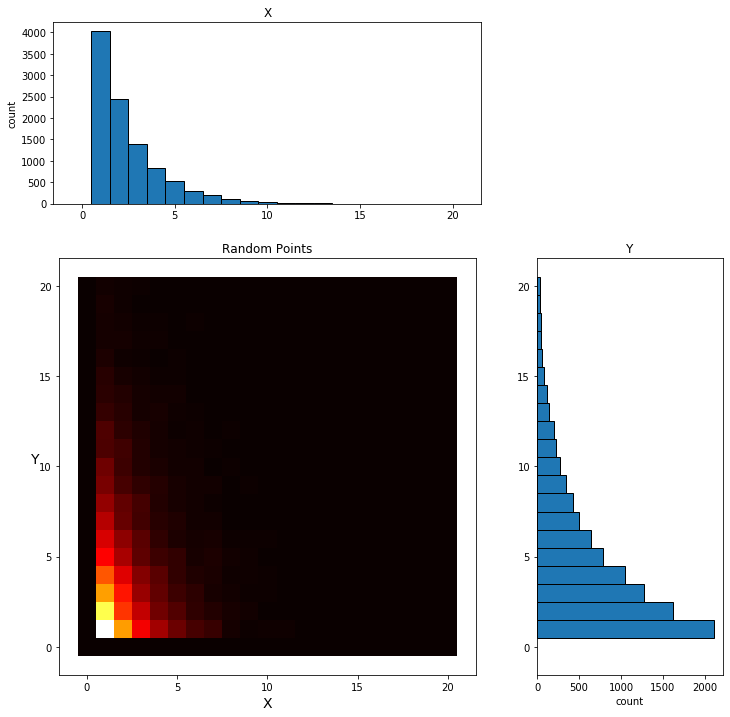

In [113]:
def geom_rvs(p=0.5,size=1000):
    res = []
    for k in range(size):
        x = geom.rvs(p)
        while (x > 20):
            x = geom.rvs(p)
        res.append(x)
    return res
    

seed(0)

num_trials = 10**4

#  Your code here

X = geom_rvs(0.4, num_trials)
Y = geom_rvs(0.2, num_trials)
drawHeatMap(X,Y, 'Random Points')


## Part D -- Be Creative


Play around with various possibilities, and display something
you find interesting, with at two different distributions on
the two axes. 

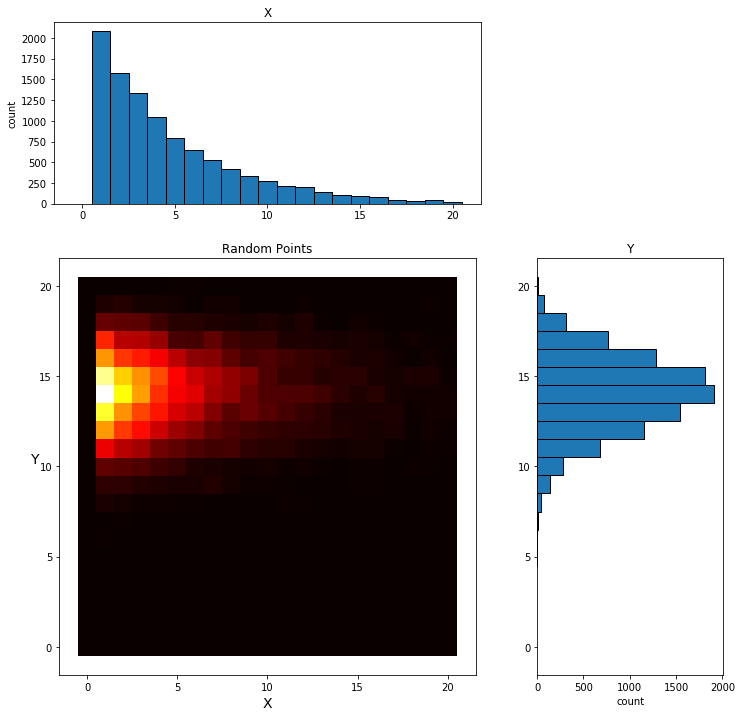

In [114]:
# (d) 
seed(0)

num_trials = 10**4

#  Your code here

X = geom_rvs(0.2,num_trials)
Y = [binom.rvs(20,0.7) for x in range(num_trials)]
drawHeatMap(X,Y,"Random Points")


## Problem Three -- Display of Discrete Bivariate data in 3D

An alternative to the heatmap is to draw discrete bivariate data in "faux 3D" where the perspective gives the
idea of real 3D data. Sophisticated drawing programs will allow the user to rotate the view in real time, but for now
we will simply explore a simple 3D framework in Matplotlib from a single perspective. 

## Part A

Repeat problem 2 (A) with the same data, but using the function  `draw_3D_histogram`. 

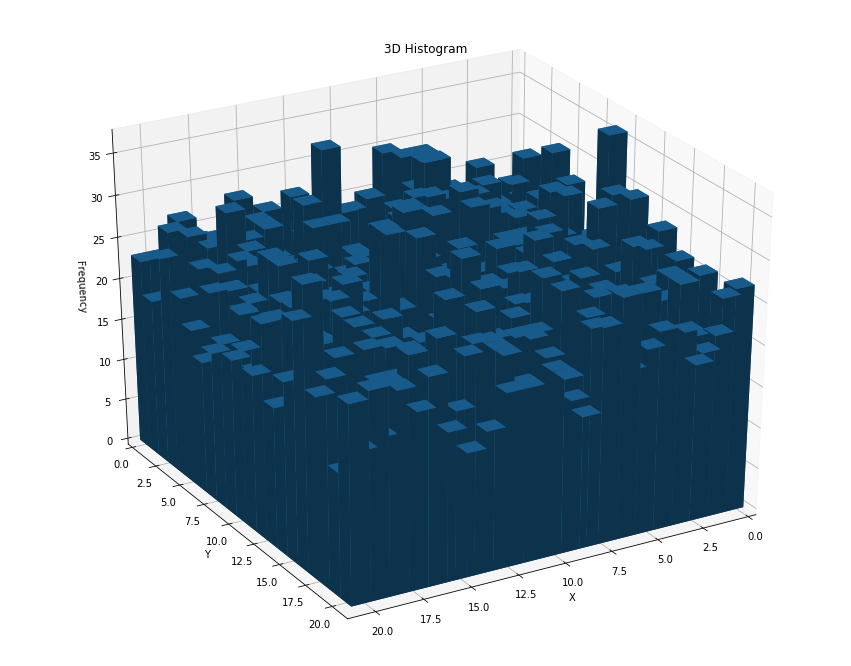

In [115]:
seed(0)

num_trials = 10**4

#  Your code here

X = [randint(21) for x in range(num_trials)]
Y = [randint(21) for y in range(num_trials)]
draw_3D_histogram(X,Y)

## Part B

Repeat problem 2 (B) with the same data, but using a 3D histogram.

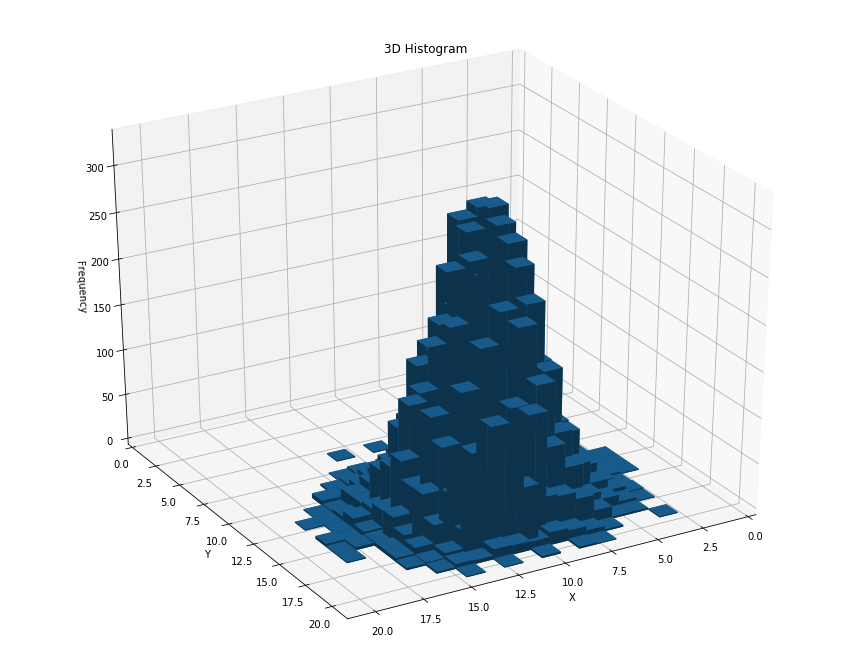

In [116]:
seed(0)
          
num_trials = 10**4

#  Your code here

X = [binom.rvs(20,0.5) for x in range(num_trials)]
Y = [binom.rvs(20,0.7) for x in range(num_trials)]
draw_3D_histogram(X,Y)

## Part C

Repeat problem 2 (C) with the same data, but using a 3D histogram.

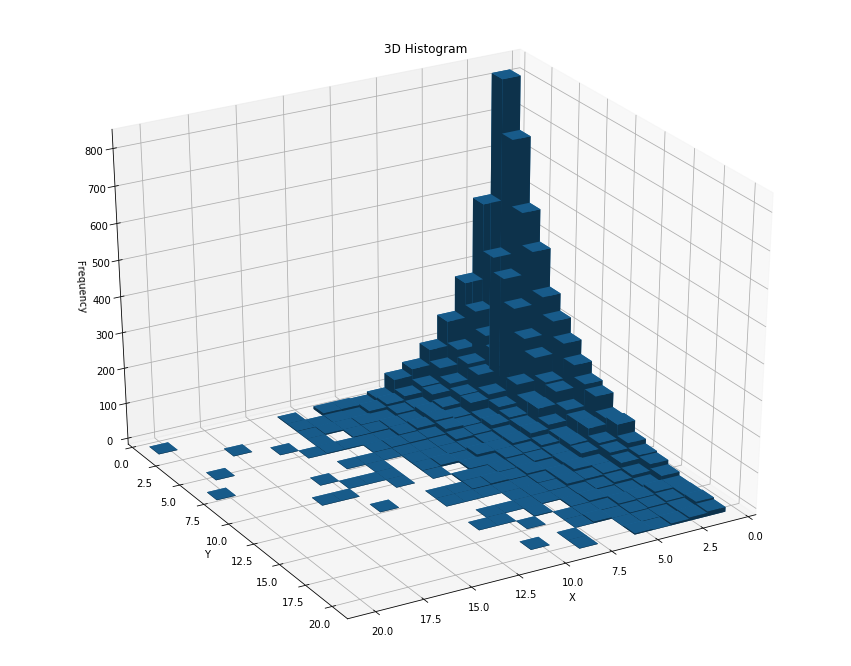

In [117]:
seed(0)

num_trials = 10**4

#  Your code here

X = geom_rvs(0.4, num_trials)
Y = geom_rvs(0.2, num_trials)
draw_3D_histogram(X,Y)

## Part D -- Be Creative!

Repeat problem 10 (d) with the same data, but using a 3D histogram. You may do the same exact thing or try something different!

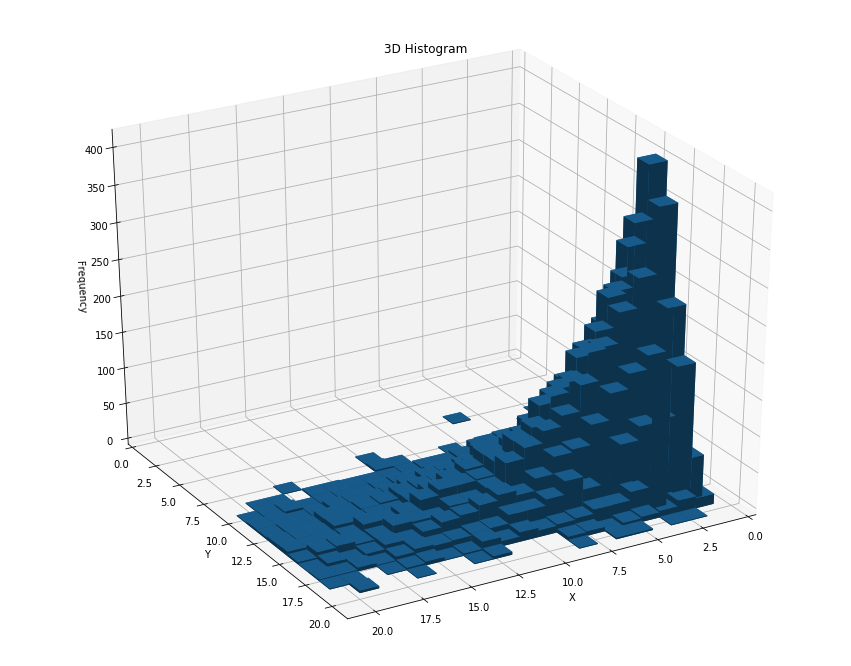

In [118]:
seed(0)

num_trials = 10**4

#  Your code here

X = geom_rvs(0.2,num_trials)
Y = [binom.rvs(20,0.7) for x in range(num_trials)]
draw_3D_histogram(X,Y)

## Problem Four -- Plotting 3D data in 3D

Finally, we will explore the use of 3D scatterplots to display continuous data. We will choose a volume which is 2 units on a size, with the origin in the center, so the 8 corners will be (1,1,1), (1,1,-1), and so on. 

We will use the function `draw_3D_scatter` provided in the first code cell. 


## Part A

First, plot 3D data with a uniform distribution along each axis, so for each
of X, Y, and Z, use:

            uniform.rvs(size=num_trials)
            
using the function `draw_3D_scatter`. 
            
Now try shifting to the center: 

            uniform.rvs(size=num_trials) - 1/2
            
Notice how the range of the uniform value affects where they end up in 3D. 

Finally, plot 3D data with a uniform distribution along each axis, scaled and shifted into the range [-1..1]:

            2*uniform.rvs(size=num_trials) - 1
    
Submit the third graph.     

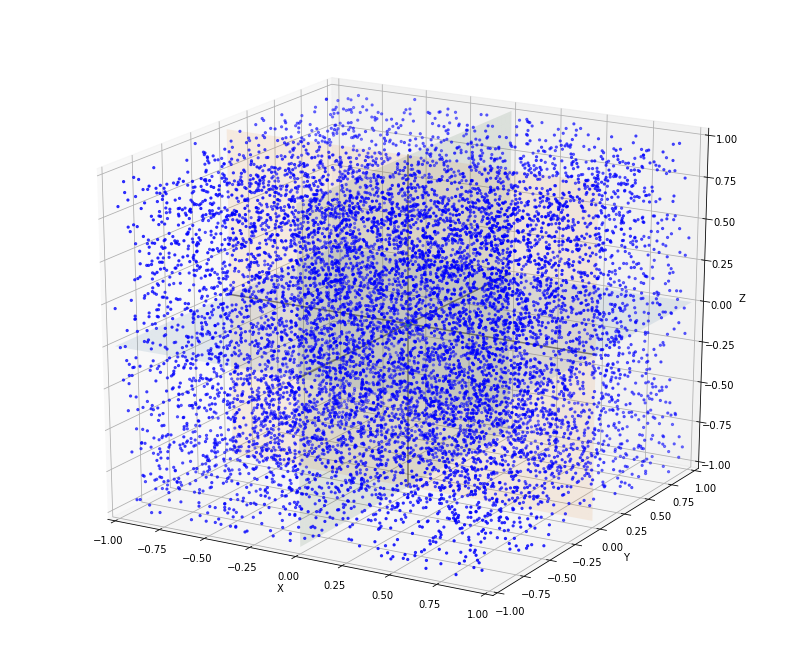

In [119]:
seed(0) 
num_trials = 10**4
   
# Your code here

X = 2*uniform.rvs(size=num_trials)-1
Y = 2*uniform.rvs(size=num_trials)-1
Z = 2*uniform.rvs(size=num_trials)-1

draw_3D_scatter(X,Y,Z)

## Part B

Now plot 3D data with the normal distribution along each axis, using

            norm.rvs(0,sigma,size=num_trials) 
    
for various sigmas between 0.01 and 1.0.    

Submit the one that gives the best illustration of 2D normal (your choice!). 

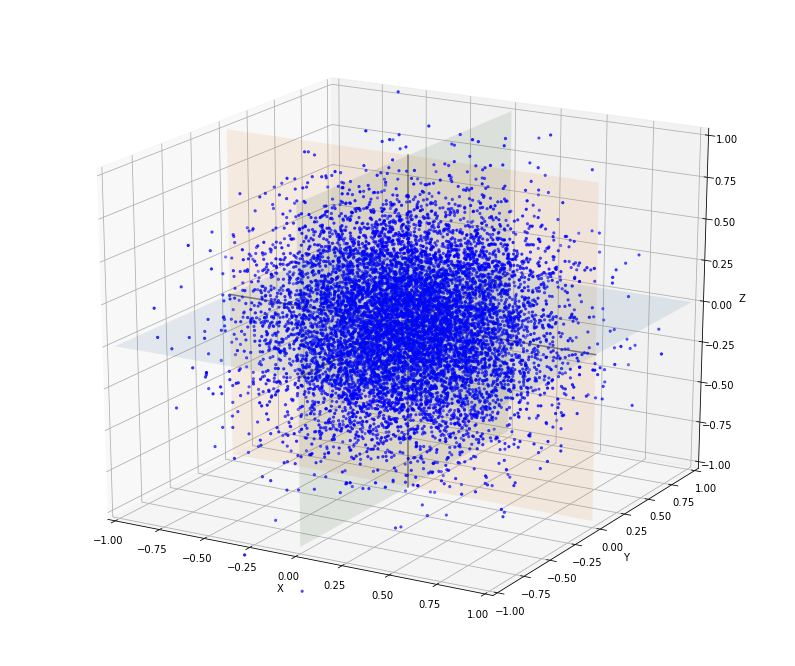

In [120]:
seed(0) 
num_trials = 10**4

# Your code here

X = norm.rvs(0,0.33,size=num_trials)
Y = norm.rvs(0,0.33,size=num_trials)
Z = norm.rvs(0,0.33,size=num_trials)

draw_3D_scatter(X,Y,Z)

## Part C

Now plot 3D data with the exponential distribution along each axis, but shifted so that it
starts in the "front corner" of the cube:

            expon.rvs(0,1/lam,size=num_trials)-1
        
You will need to explicitly create a list of num_trial variates for this one (you can't use the size parameter, because of the shifting).

Try various lam values, between 1/2 and 10, and submit the one that gives
the "best" illustration of exponential variation in 3 dimensions. 
    

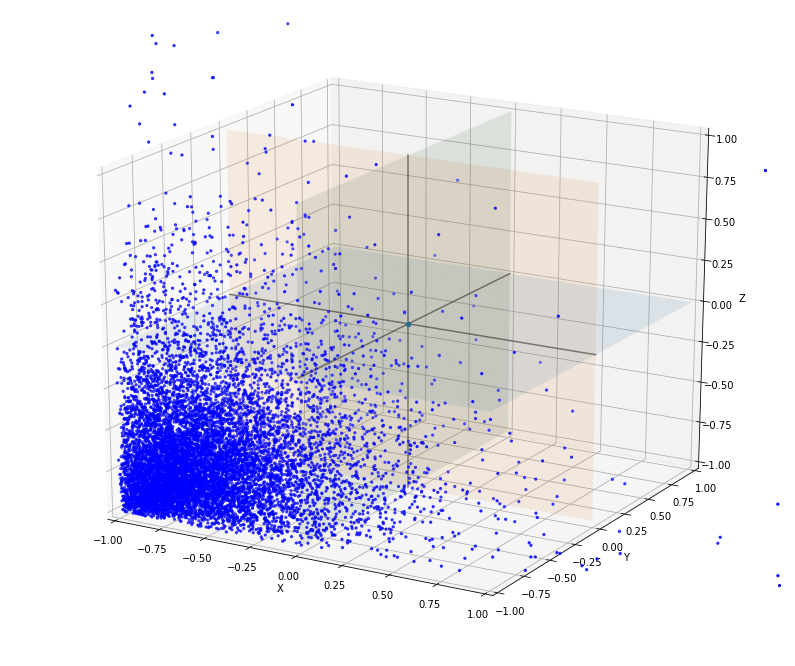

In [121]:
seed(0) 
num_trials = 10**4

# Your code here

lam = 3
X = [expon.rvs(0,1/lam)-1 for x in range(num_trials)]
Y = [expon.rvs(0,1/lam)-1 for x in range(num_trials)]
Z = [expon.rvs(0,1/lam)-1 for x in range(num_trials)]

draw_3D_scatter(X,Y,Z)

## Part D

Now try your own, mixing the three distributions. 


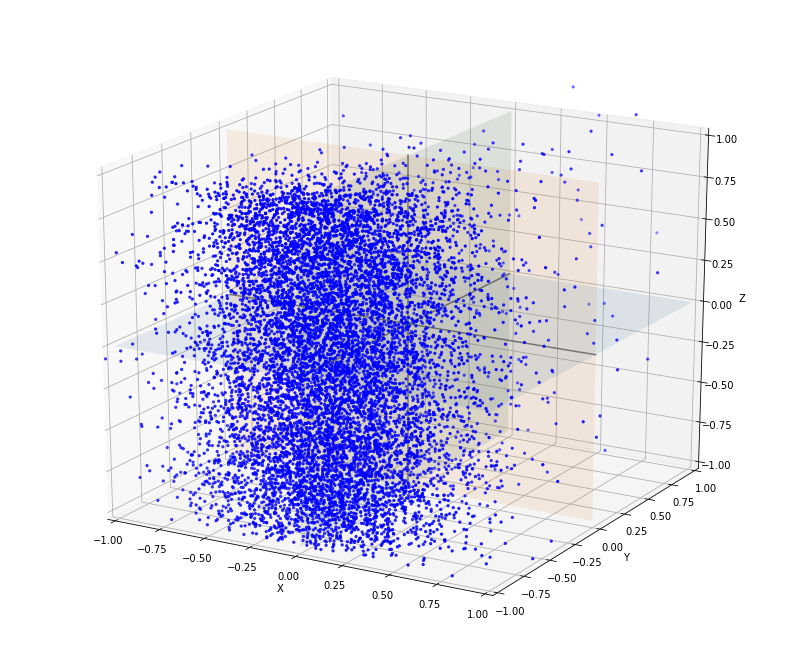

In [122]:
seed(0) 
num_trials = 10**4
   
# Your code here

lam = 3
X = norm.rvs(0,0.33,size=num_trials)
Y = [expon.rvs(0,1/lam)-1 for x in range(num_trials)]
Z = 2*uniform.rvs(size=num_trials)-1

draw_3D_scatter(X,Y,Z)

## Student Data

For the remaining problems, we will use this data set, which contains homework, midterm, and GPA values
for a BU class which shall remain nameless (not this term)!

Take a look at the 3D graphs of this data before you proceed!

In [123]:
HWS = [
   89.39, 72.63, 61.55, 97.53, 93.27, 78.59, 94.79, 82.19, 83.9, 77.27, 
   58.23, 74.14, 91.95, 33.52, 71.02, 91.85, 88.54, 80.68, 91.95, 59.75, 
   19.69, 51.04, 84.18, 63.73, 85.6, 80.11, 81.15, 45.36, 69.03, 78.97, 
   90.62, 82.57, 79.92, 84.84, 83.52, 49.33, 82.57, 84.84, 82.38, 67.14, 
   53.69, 89.67, 82.57, 71.97, 75.94, 82.29, 96.02, 80.3, 89.77, 94.5, 
   59.37, 92.7, 74.14, 89.96, 24.33, 91.09, 82.76, 88.54, 88.54, 63.44, 
   90.72, 31.81, 64.96, 74.52, 64.39, 44.79, 94.69, 80.2, 83.9, 49.24, 
   64.2, 59.56, 75.09, 73.86, 80.68, 87.69, 40.91, 81.53, 87.02, 88.92, 
   58.61, 15.91, 80.2, 79.35, 40.34, 91.57, 82.38, 76.7, 72.25, 70.55, 
   80.49, 68.18, 82.67, 81.25, 91.57, 84.18, 76.89, 77.93, 91.76, 56.81, 
   85.79, 38.54, 85.13, 43.84, 92.8, 58.23, 70.92, 90.62, 82.95, 84.37, 90.62, 32.77]
MID = [
94.0,91.0,89.0,98.0,97.0,89.0,100.0,92.5,96.0,97.0,77.5,76.0,92.0,75.0,82.5,
95.0,91.5,98.0,93.0,78.0,66.5,67.5,97.0,81.0,99.0,79.0,97.0,90.0,66.0,
93.0,91.0,70.0,97.0,85.5,89.5,96.0,88.5,78.0,87.0,0.0,71.5,73.5,97.0,
79.5,88.0,84.5,96.0,96.0,99.0,90.0,94.0,100.0,93.5,98.0,80.0,90.0,91.0,
96.0,89.0,85.0,96.0,81.5,100.0,92.0,81.0,94.0,92.0,91.5,99.0,91.0,80.0,
77.5,74.0,77.0,91.5,92.0,91.0,98.0,93.0,99.0,90.0,76.0,75.0,85.0,72.5,
98.0,83.0,65.0,94.5,85.0,84.0,89.0,82.5,84.5,97.0,89.0,78.0,86.0,96.0,
90.0,84.5,90.0,87.0,89.0,74.5,60.0,74.5,90.0,91.0,92.0,93.0,65.5]
GPA = [
3.76,3.57,3.75,4.0,3.16,3.01,3.59,2.94,3.55,3.24,2.89,3.46,3.86,2.06,2.83,
3.41,3.61,3.6,3.76,1.99,2.08,2.21,3.88,3.1,3.56,3.37,3.34,3.1,2.71,
3.34,1.72,2.7,3.04,3.36,3.92,3.29,3.55,2.98,3.5,3.07,2.63,3.2,3.84,
2.88,2.46,3.55,3.84,2.92,3.72,3.94,2.78,3.83,3.14,3.62,2.95,3.75,3.49,
3.28,3.89,2.94,3.43,1.92,2.89,3.26,3.29,2.35,3.45,3.01,3.79,3.21,3.44,
2.72,3.3,3.69,3.56,3.93,3.02,3.46,3.59,3.93,3.39,2.57,3.34,3.93,3.01,
4.0,3.08,2.34,3.43,3.31,3.67,3.53,3.51,3.08,3.82,3.46,3.29,3.38,3.68,
3.63,2.7,2.88,3.32,2.54,3.39,3.2,3.04,3.59,3.36,3.03,3.66,3.08]


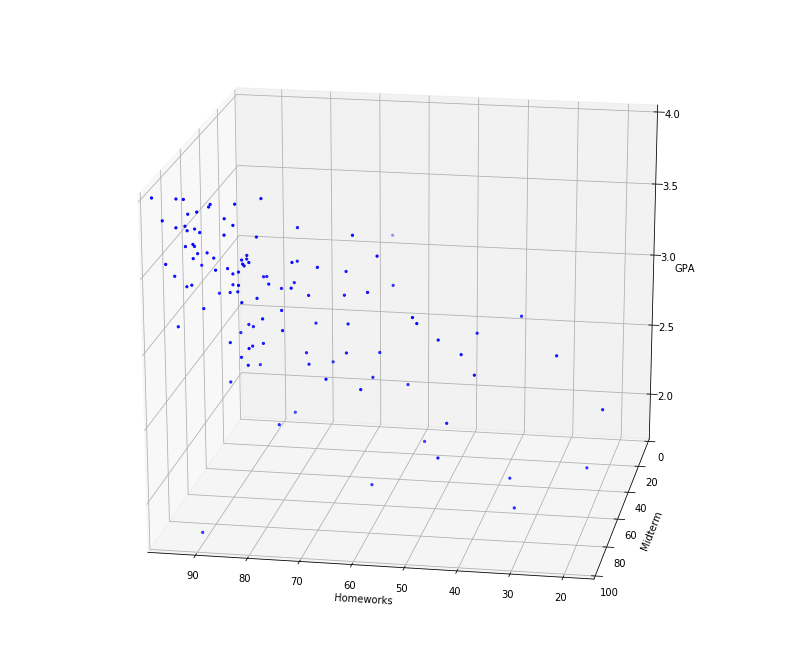

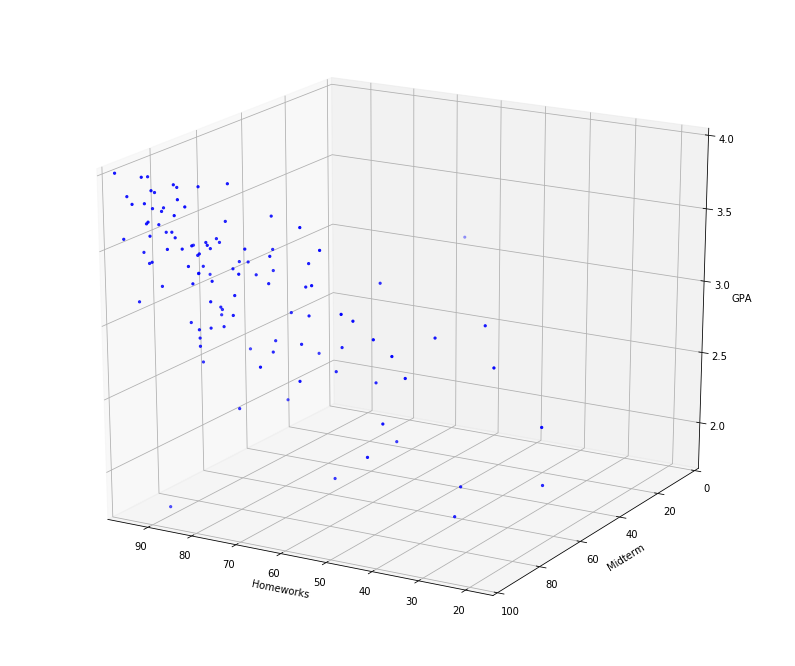

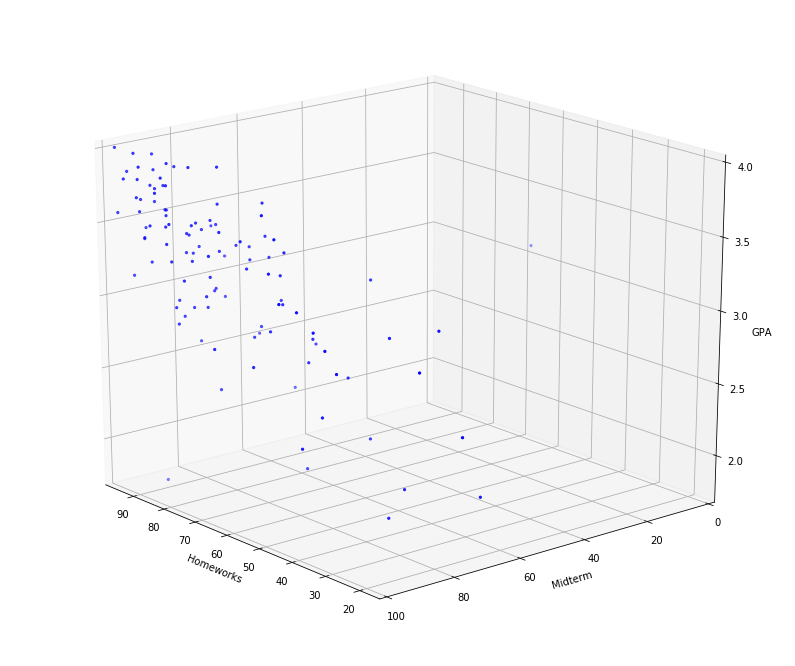

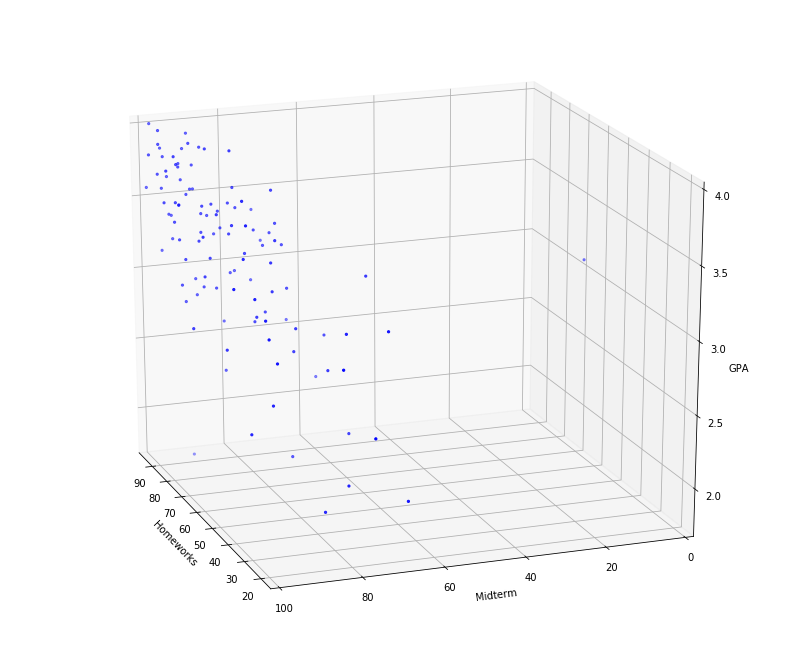

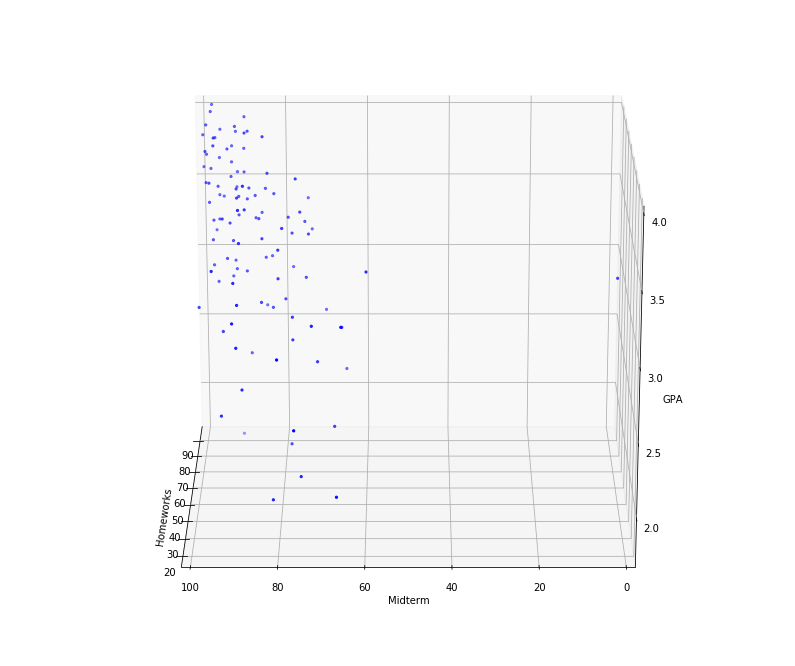

In [124]:
draw_3D_scatter(HWS,MID,GPA,labels=['Homeworks','Midterm','GPA'], reference=False,rot=100)
draw_3D_scatter(HWS,MID,GPA,labels=['Homeworks','Midterm','GPA'], reference=False,rot=120)
draw_3D_scatter(HWS,MID,GPA,labels=['Homeworks','Midterm','GPA'], reference=False,rot=140)
draw_3D_scatter(HWS,MID,GPA,labels=['Homeworks','Midterm','GPA'], reference=False,rot=160)
draw_3D_scatter(HWS,MID,GPA,labels=['Homeworks','Midterm','GPA'], reference=False,rot=180)

## Problem Five: Linear Regression

For this problem, in Part A you will simply use the `LinearRegression(X,Y)` function from lecture (in first code cell above!)
that draws a scatterplot, the linear regression line, the midpoint, and the relevant statistics. 

For  Part B you will draw the regression line and residual plot for some data related to a recent class  (anonymous of course!). For Part C you will think about what you are seeing and answer some questions about the data and whether a linear model is appropriate for this data. 


## Part A  (Farentheit vs Celsius)


For this part, simply draw the Farenheit vs Celsius data as shown in lecture. 


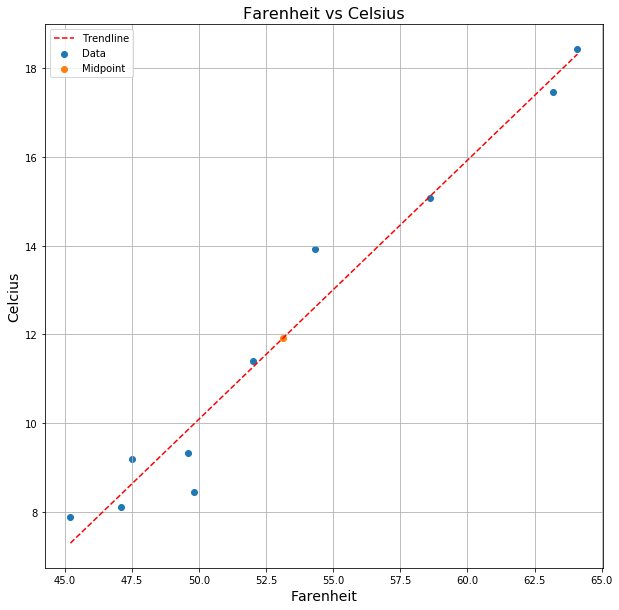

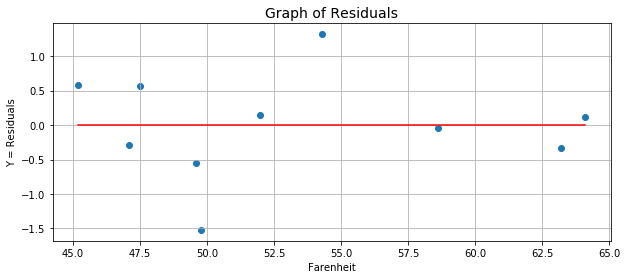


mean(x):	53.14	std(x):	6.3938
mean(y):	11.9278	std(y):	3.8009

rho:   0.9817	R^2:   0.9638

Residual SS:   5.2364	Explained SS: 139.231	Total SS:   144.4674

Regression Line: y = 0.5836 * x - 19.0844


In [125]:
Xfarenheit = [45.2, 47.1, 47.5, 49.6, 49.8, 52.0, 54.3, 58.6, 63.2, 64.1] 
Ycelsius = [7.8752, 8.117, 9.2009, 9.3167, 8.4564, 11.4075, 13.9236, 15.0762, 17.4678, 18.4362]


# Your code here

LinearRegression(Xfarenheit,Ycelsius,"Farenheit vs Celsius", xlab="Farenheit",ylab="Celcius")

## Part B (GPA vs HWS)

Display the linear regression of the following two data sets, using appropriate title and labels:

     X = GPA
     Y = HWS


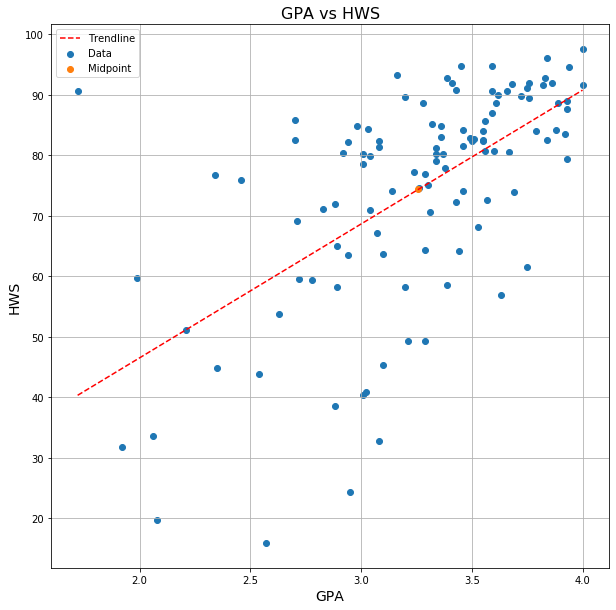

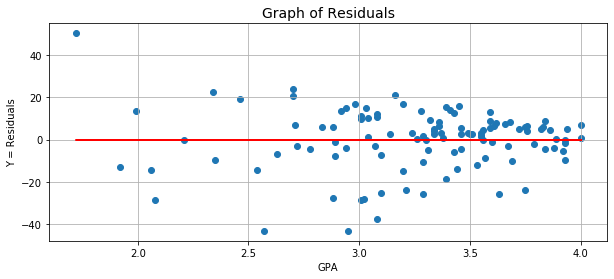


mean(x):	3.2588	std(x):	0.488
mean(y):	74.3372	std(y):	17.9342

rho:   0.6015	R^2:   0.3618

Residual SS:   22988.473	Explained SS: 13034.604	Total SS:   36023.077

Regression Line: y = 22.1082 * x + 2.29


In [126]:
# Your code here
X = GPA
Y = HWS
LinearRegression(X,Y,titl="GPA vs HWS", xlab="GPA",ylab="HWS")

## Part C


Looking at the data and the statistics for Part B, answer the following questions to the best of your ability:

<blockquote>
    (i) Just looking at the graphical display of the data, would you think there is
        a linear trend to this data, i.e., is there a correlation between
        GPA and homework scores in CS 237? What do you see?
</blockquote>

<blockquote>
   (ii) Now, what does the $R^2$ value tell you about fitting a linear model to this data?
</blockquote>

Linear regression isn't always appropriate, and not only because of the $R^2$ score.  Please read through the following page outlining the principal conditions necessary for linear regression:

https://www.statisticshowto.datasciencecentral.com/assumptions-conditions-for-regression/

<blockquote>
   (iii) Do you see any other problems, related to the conditions you read about above? (Hint: look at the residual plot).) Can you think of any reason why this might be the case for this data set? (Hint: Just answer these by "eyeballing" the data, don't worry about doing a precise analysis.)
</blockquote>

## SOLUTION
<p>(i) I think there is a linear trend to this data. I see a direct relationship between the two fields.</p>
<p>(ii) R^2 value tells me that fitting a linear model to this data isn't really a good choice. I guess I was wrong.</p>
<p>(iii) I see that explained SS seems small compared to residual SS. Therefore, the percentage of explained by model seems to have a lower percentage. This might be the case because the trend isn't so precise in the lower part. </p>

## Problem Six: Linear Regression and Outliers

Now we will look at pairing the Midterm Score data with GPA. Again, you will apply the display function used in the previous problem to display the data and statistics, and then think about what happens when one
of the data points is clearly an outlier. 

Notice what happens when we graph the GPA vs MID data:

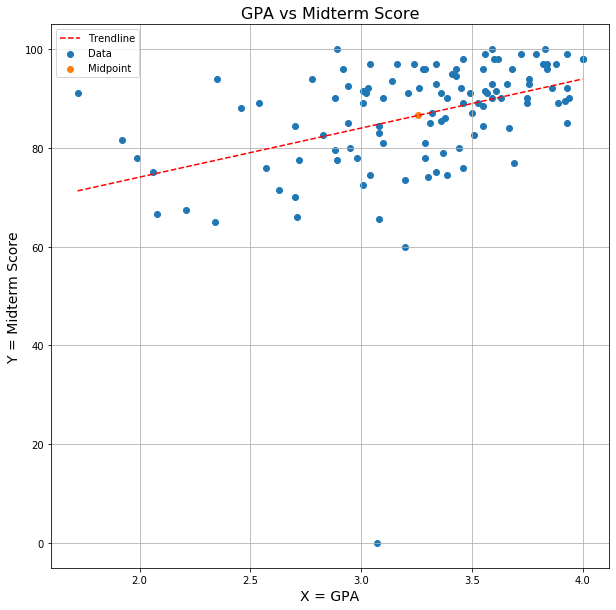

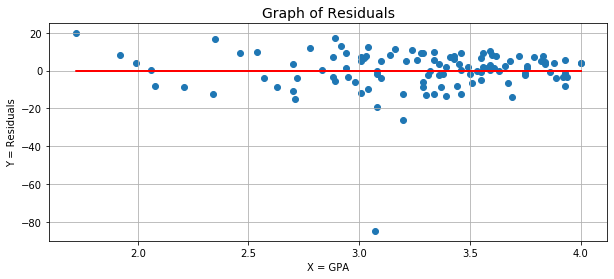


mean(x):	3.2588	std(x):	0.488
mean(y):	86.5536	std(y):	12.377

rho:   0.3914	R^2:   0.1532

Residual SS:   14528.5963	Explained SS: 2628.5823	Total SS:   17157.1786

Regression Line: y = 9.9281 * x + 54.1995


In [127]:
LinearRegression(GPA,MID,"GPA vs Midterm Score",xlab="X = GPA",ylab="Y = Midterm Score")


## Part A

There is clearly a violation of one of the conditions for linear regression here, in that there is an outlier in the Midterm data, because of a student in the data that didn't take the midterm and then at some point dropped the class. It is always a serious question whether you can eliminate some of your data because it is inconvenient, but in this case it is clear that if a student dropped the class, then the data on homeworks AND midterm are not really relevant to what we want to know, which is the relationship between GPA and performance in two parts of the class marks. 

First, you must find the outlier: use the `index(...)` function to find the
index of the value in MID which is 0, and then eliminate this data point from
all three lists, creating new sets GPA2, HWS2, and MID2. 


Redraw the results for GPA and MID with this new data set. 

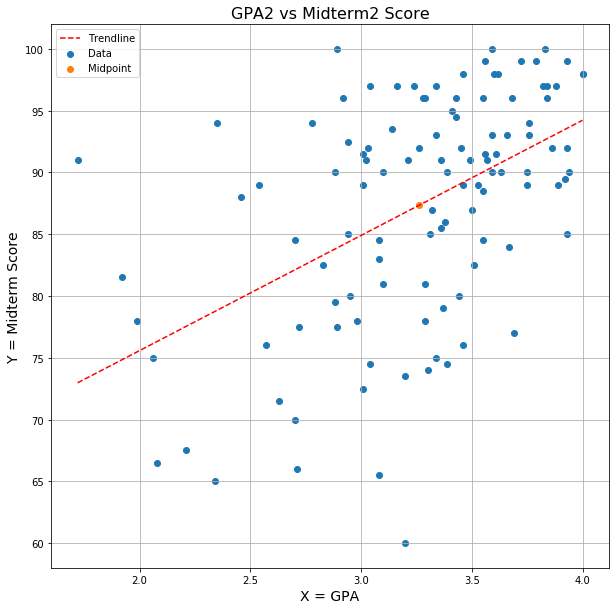

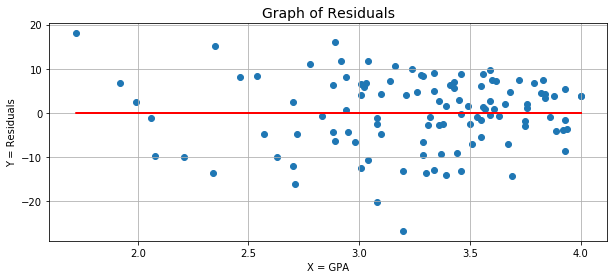


mean(x):	3.2605	std(x):	0.4898
mean(y):	87.3333	std(y):	9.2989

rho:   0.4911	R^2:   0.2411

Residual SS:   7283.7304	Explained SS: 2314.4363	Total SS:   9598.1667

Regression Line: y = 9.3223 * x + 56.9377


In [128]:
outlier = MID.index(0)

GPA2 = GPA.copy()
del GPA2[outlier]
HWS2 = HWS.copy()
del HWS2[outlier]
MID2 = MID.copy()
del MID2[outlier]

LinearRegression(GPA2,MID2,"GPA2 vs Midterm2 Score",xlab="X = GPA",ylab="Y = Midterm Score")

### Part B

Now answer the following questions:

<blockquote>
    (i) How much did removing the outlier affect our results with GPA vs MID? 
 In particular, look at $ var(y)$ and the $R^2$ value. 
</blockquote>
<blockquote>
    (ii) What does this say (with these two examples as evidence) about the sensitivity of $R^2$ to outliers in the data set?
</blockquote>    
    

## SOLUTION
<p>(i) Removing the outlier decreased the value of var(y), but increased in the value of R^2.</p>
<p>(ii) This tells me that the outlier plays a significant role in sensitivity of R^2.</p>

## Problem Seven: Linear Regression  

In this problem you will  compare HWS2 and MID2 data, using the regression line to do some prediction,  and thinking about what you have seen in all the problems so far. 

## Part A

Now draw the regression for the following:

     X = HWS2
     Y = MID2
     

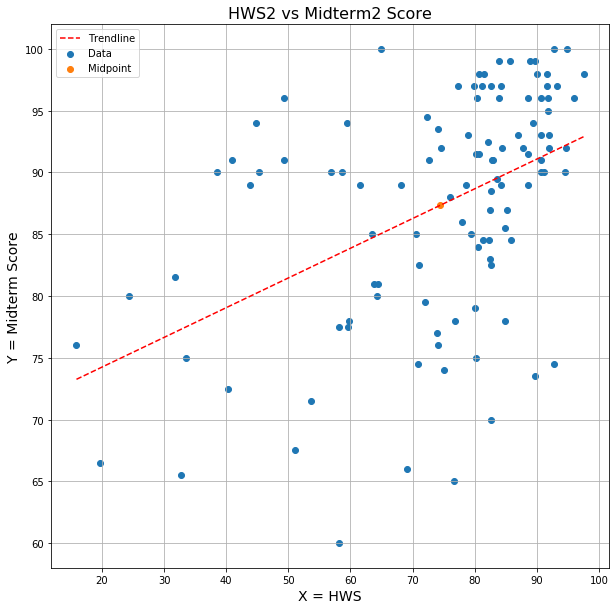

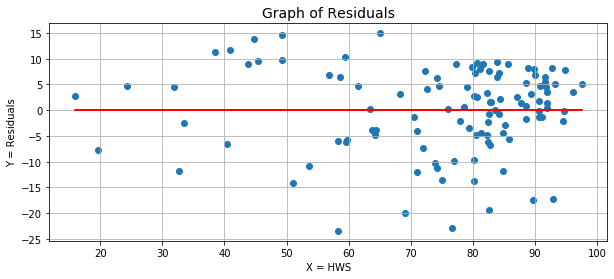


mean(x):	74.4021	std(x):	18.0017
mean(y):	87.3333	std(y):	9.2989

rho:   0.4659	R^2:   0.2171

Residual SS:   7514.3852	Explained SS: 2083.7815	Total SS:   9598.1667

Regression Line: y = 0.2407 * x + 69.4258


In [129]:
# Your code here

X = HWS2
Y = MID2

LinearRegression(X,Y,"HWS2 vs Midterm2 Score",xlab="X = HWS",ylab="Y = Midterm Score")

## Part  B

We eliminated a student from the class who dropped the course before the midterm. Hm, I wonder how our model would have predicted his/her score for homeworks (for which we have a score) and midterm (for which we don't)? We will use the corrected values, after we removed the outlier (HWS2, MID2, GPA2). 

The outlier student had the following values:

      Homework Score:  67.14
      Midterm:         0.0
      GPA:             3.07

<blockquote>
(i) Calculate, based on the appropriate regression equation, what the midterm score would be predicted to be for this student based on the GPA.
</blockquote>

<blockquote>
(ii) Using the regression line for HWS2 vs MID2, what would be the prediction for the midterm score be for this student based on his/her homework score? How well does this compare with the value from (i)? 
</blockquote>

<blockquote>
(iii) Calculate, based on the appropriate regression equation, what the homework score would be predicted to be for this student based on the GPA; how does it compare with the actual value?
</blockquote>


## SOLUTION
<p>(i) The appropriate equation: y = 9.3223 * x + 56.9377. Hence, 9.3223 * 3.07 + 56.9377 = $\boxed{85.5572}$</p>
<p>(ii) The regression line: y = 0.2407 * x + 69.4258. Hence, 0.2407 * 67.14 + 69.4258 =  $\boxed{85.5864}$. This is pretty close to the value gained from (i).</p>

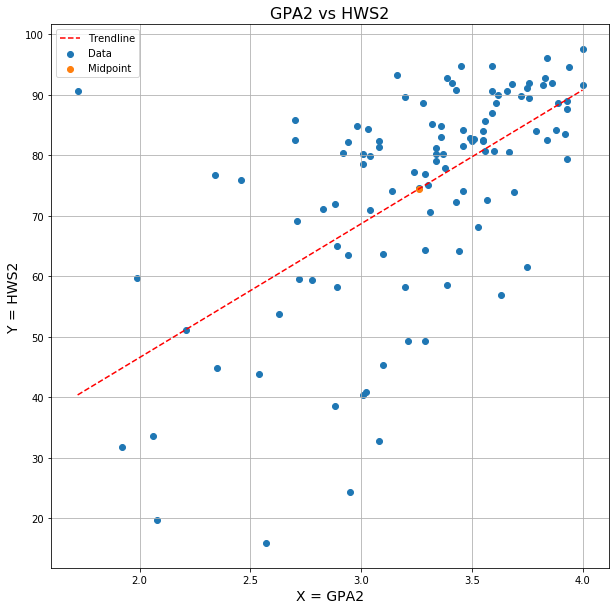

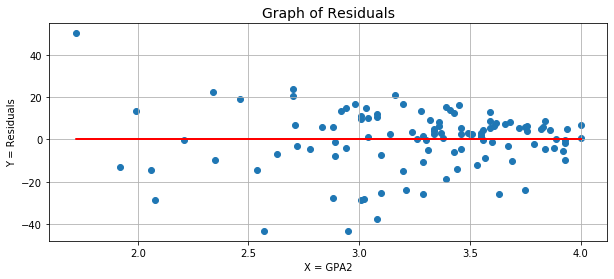


mean(x):	3.2605	std(x):	0.4898
mean(y):	74.4021	std(y):	18.0017

rho:   0.601	R^2:   0.3612

Residual SS:   22979.2438	Explained SS: 12991.5664	Total SS:   35970.8102

Regression Line: y = 22.0866 * x + 2.3878
The predicted homework score: 70.1937


In [130]:
#(iii)
X = GPA2
Y = HWS2
LinearRegression(X,Y,"GPA2 vs HWS2",xlab="X = GPA2",ylab="Y = HWS2")
x = 3.07
y = 22.0866 * x + 2.3878
print("The predicted homework score: " + str(round4(y)))


## Part  C

Answer the following questions in a short sentence or two: 

<blockquote>
(i) Did you see any other problems with the necessary conditions for linear regression in the other pairings of data from this set?
</blockquote>

<blockquote>
(ii) Let us consider these three pairs of data, after eliminating the outlier but not worrying about any of the other conditions for linear regression. Using the $R^2$ value, in what order do you put them from weakest to strongest linear relationship? What do you think might be the causes for them being ordered in this way? Is there anything surprising about this?
</blockquote>

## SOLUTION
<p>(i) I believe there is a problem with the residuals being distributed normally. Also, homoscedasticity could have been the problem.</p>
<p>(ii) GPA2 vs HWS2 : R2 = 0.3612 ; HWS2 vs MIDTERM2 : R2 = 0.2171 ; GPA2 vs MIDTERM2 : R2 = 0.2411.</p>
<p>1: GPA2 vs HWS2</p>
<p>2: GPA2 vs MID2</p>
<p>3: HWS2 vs MID2</p>
<p>I am not sure about the causes specifically that makes this results of the data. However, I am surprised that HWS2 vs MID2 is the lowest correlated.</p>

## Problem Eight Multiple Linear Regression

In this problem we will apply the technique of multiple linear regression to the data in
the previous problem and predict some values from the regression plane. The next cell contains the code for displaying the regression plane.

Run this cell and observe how it creates a 3D view of the linear regression plane. 

In [131]:
# Given data vectors X and Y (must be same length), calculate the vector Theta
# which contains the parameters produced by regression. 

def getTheta(X,Y):
    return inv(X.T @ X) @ X.T @ Y

def multiple_regression(X1,X2,Y,verbose=False,el=10,az=180):
    
    # make sure they are numpy arrays
    X1 = np.array(X1)
    X2 = np.array(X2)
    Y = np.array(Y)
    
    # Collect the dependent variables and add the bias term 1 to front
    X = transpose([ones(len(X1)),X1,X2])
        
    Theta = getTheta(X,Y)

    if verbose:
        print("\nRegression Plane:  y = " + str(round4(Theta[0])) + " + " 
                                          + str(round4(Theta[1])) + " * x1 + " 
                                          + str(round4(Theta[2])) + " * x2")

    # Plot the surface.
    Xplot = np.arange(min(X1), max(X1)+0.1, 0.1)
    Yplot = np.arange(min(X2), max(X2)+0.1, 0.1)
    Xplot, Yplot = np.meshgrid(Xplot, Yplot)
    Zplot = np.zeros_like(Xplot)
    for r in range(len(Zplot)):
        for c in range(len(Zplot[0])):
            Zplot[r][c] = Theta[0] + Theta[1]*Xplot[r][c] + Theta[2]*Yplot[r][c]


    fig = plt.figure(figsize=(12,10))
    ax = fig.gca(projection='3d')
    ax.view_init(elev=el, azim=az)

 #   ax.set_xlim(min(X),)
 #   ax.set_ylim(lo,hi)
 #   ax.set_zlim(lo,hi)
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("Y")
    ax.scatter(X1,X2,Y)
    ax.plot_surface(Xplot,Yplot,Zplot,alpha=0.5)

    plt.show()


Regression Plane:  y = 56.6079 + 6.2713 * x1 + 0.1381 * x2


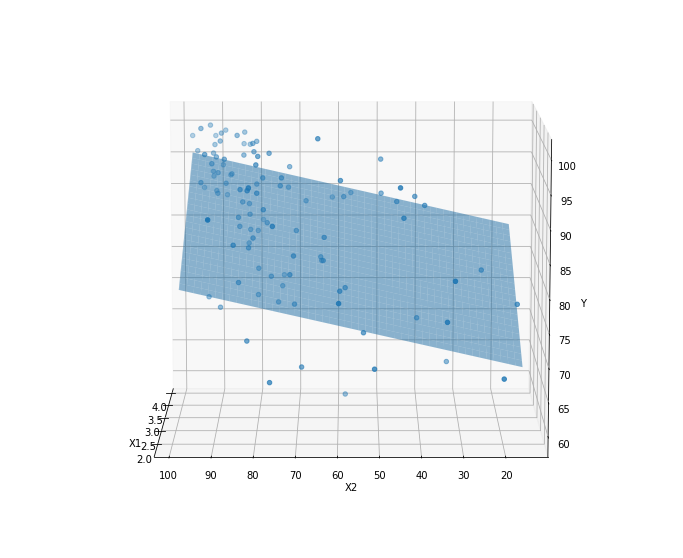

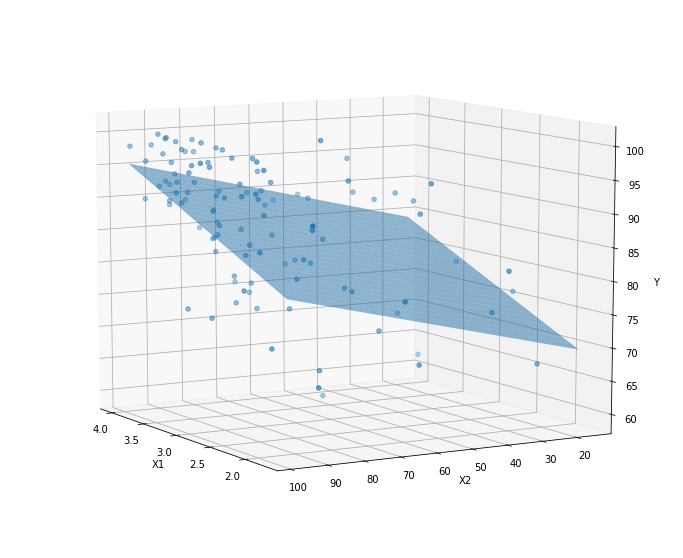

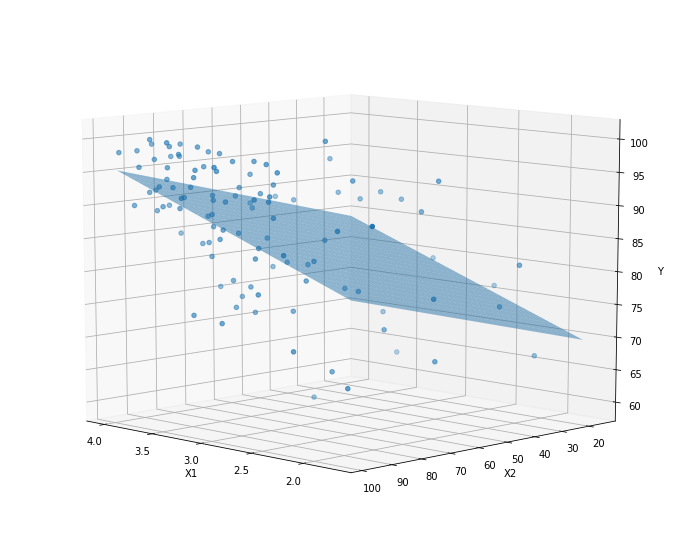

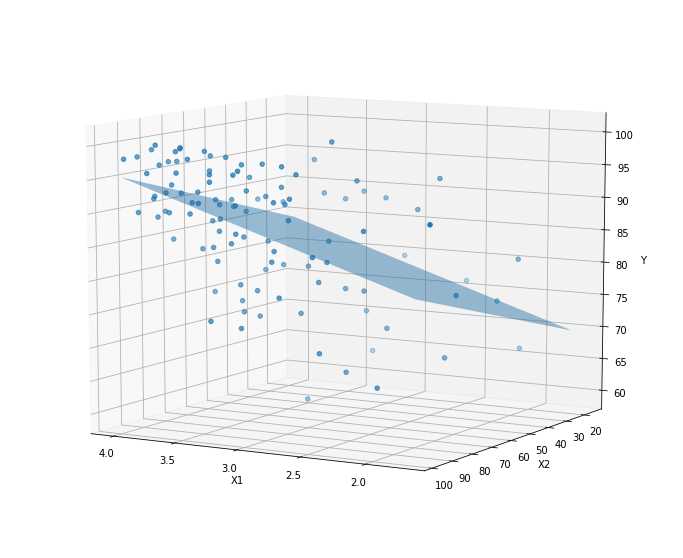

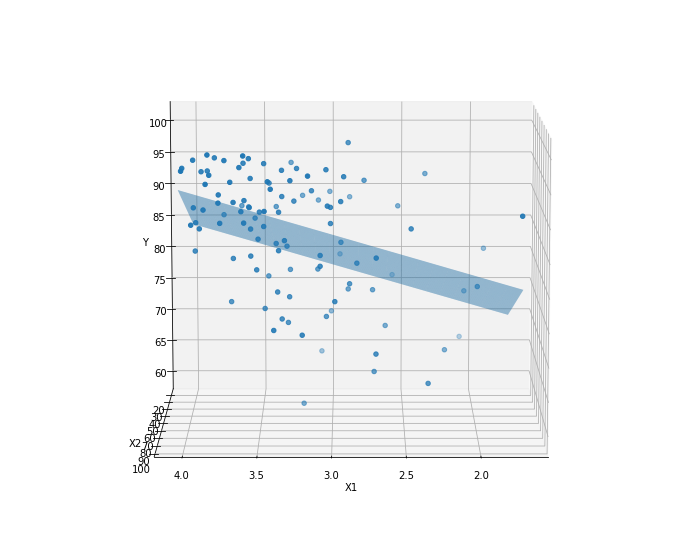

In [132]:
X1 = GPA2
X2 = HWS2
Y = MID2

multiple_regression(X1,X2,Y,True,el=10,az=180)
multiple_regression(X1,X2,Y,el=10,az=150)
multiple_regression(X1,X2,Y,el=10,az=135)
multiple_regression(X1,X2,Y,el=10,az=120)
multiple_regression(X1,X2,Y,el=10,az=90)

### Part A

Now we will determine which pair of data best predict the other two. In the last
homework, we proved that

$$\rho(aX+b,Y)\,=\,\rho(X,Y)$$

for $a>0$. An important corollary of this is the important fact that when we predict
a linear regression line, we end up with a random variable $\hat{Y}=mX+b$ for slope $m$ and y-intercept $b$. 
But this means that $\rho$ represents the correlation between $Y$ and $\hat{Y}$, that is,
the actual values of $Y$ and the predicted values of $Y$:

$$\rho(X,Y)\,=\,\rho(mX+b,Y)\,=\,\rho(\hat{Y},Y)$$

This provides an explanation for how we can calculate the $R^2$ value for multivariate regression:
compare the actual values along some dimension with the values predicted by the other dimensions!

Therefore, using
the formulae for RSS, TSS, and $R^2$:

$$RSS\,=\,\sum_{i=0}^N (\hat{y}_i - \mu_Y)^2$$

$$TSS\,=\,\sum_{i=0}^N ({y_i} - \mu_Y)^2$$

$$R^2\,=\,\frac{RSS}{TSS}$$

and the regression equation determined for this data set:

$$  \hat{Y} = 56.6079 + 6.2713 \cdot X_1 + 0.1381 \cdot X_2$$
            
calculate the $R^2$ value for 

     X1 = GPA2
     X2 = HWS2
     Y = MID2
     
by simply finding $\rho(\hat{Y},Y)$. 

## Part B

Now consider the other 2 possibilities for two of these data predicting the other one (note that you don't need to consider reordering X1 and X2):


Original from Part A, predicting midterm from the other two:

>  X1 = GPA2  
>  X2 = HWS2  
>  Y = MID2  

Two others to try:  Predict HWS:

>  X1 = GPA2  
>  X2 = MID2  
>  Y = HWS2  

Predict GPA:
>  X1 = HWS2  
>  X2 = MID2  
>  Y = GPA2  


Print out your results for these latter two, and then answer the following question: Which had the highest correlation and was it relevant?

Hint:  You can print out all the graphs or just look at how the regression line is calculated from `Theta` in
the function. 

## Part C

Now answer the following questions:  
<blockquote>
(i) Which produced a better linear model? 
</blockquote>
<blockquote>
(ii) Why do you think this is the case? 
</blockquote>
<blockquote>
(iii) Were the $R^2$ values high enough to reasonably use this as a predictor of student performance?
</blockquote>